In [10]:
import iris
import numpy as np
import matplotlib.pyplot as plt
import os
import cmocean
import warnings

In [3]:
os.chdir("/home/548/eh6215/Desktop/python/BARPA_evaluation/emma/lib")
from plotting_functions import bias_plots

In [16]:
cx = iris.Constraint(longitude=lambda x: 140<=x<=155)
cy = iris.Constraint(latitude =lambda y: -10.5>=y>=-44)
   
names = {'agcd':'agcd','barpaR-E': "BARPA-EASTAUS_12km", 'barpaC-T':"BARPAC-T_km4p4","barpaC-M":"BARPAC-M_km2p2"}
    
lsm = iris.load_cube("/home/548/eh6215/lsm.nc","land_binary_mask").extract(cx&cy)[:-1]
#lsm.data  = np.m.masked_array(np.ones(lsm.shape),mask=1-lsm.data)
data = {}
ct = iris.Constraint(time=lambda t:t.point.month in [12,1,2] and t.point.year >= 1991 and t.point.year <2015)
for domain in ['agcd',"barpaR-E","barpaC-T","barpaC-M"]:
    data[domain] = {}
    data[domain]['wet days']= iris.load_cube("/short/tp28/eh6215/ESCI/daily_pr/wetdays_%s.nc"%names[domain]).extract(cx&cy&ct)
    data[domain]['wet days'].rename('wet days')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'agcd_wet_days' contains unknown cell method 'proportion'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'barpa_eastaus_12km_wet_days' contains unknown cell method 'proportion'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'barpac_t_km4p4_wet_days' contains unknown cell method 'proportion'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris

In [19]:
cy2 = iris.Constraint(latitude=lambda y: y>-30)
cy3 = iris.Constraint(latitude=lambda y: y<=-30)

tmp = iris.cube.CubeList([data["barpaC-T"]['wet days'].extract(cy2),data['barpaC-M']['wet days'].extract(cy3)])
iris.util.equalise_attributes(tmp)
tmp=tmp.concatenate_cube()
data['barpaC']={}
data['barpaC']['wet days']=tmp
cy2 = iris.Constraint(latitude =lambda y: -10.5>=y>=-44)

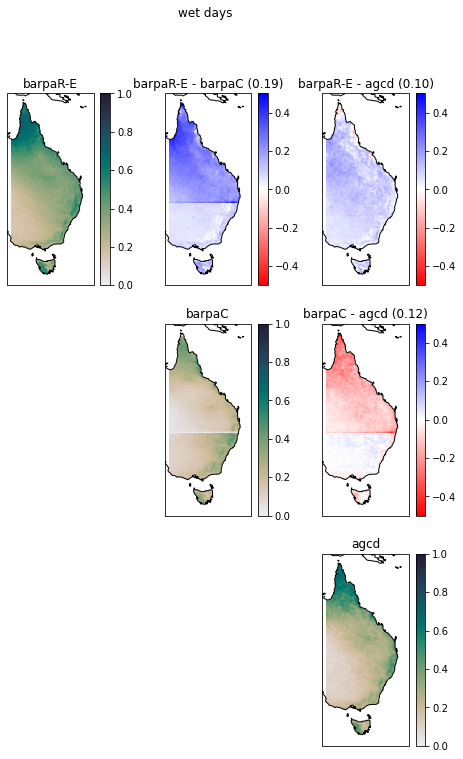

In [24]:
plt.figure(figsize=(8,12))
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    bias_plots(data,'wet days',1-lsm.extract(cy2).data,["barpaR-E","barpaC","agcd"],0,1,0.5,cmocean.cm.rain,'bwr_r',"1",Constraints=cy2&ct)

In [ ]:
plt.figure()
bias_plots(data,'wet days',1-lsm.extract(cy2).data,["BARPA-EASTAUS_12km","BARPAC-M_km2p2","agcd"],0,1,0.2,cmocean.cm.rain,'bwr_r',"1",Constraints=cy2&ct)